In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Deep.csv')

In [3]:
df

,X1,X2,Y
0,-3.980,-0.120,1
1,-3.464,-2.110,1
2,-3.461,1.890,1
3,-2.220,-3.474,1
4,-2.020,0.030,0
5,-2.010,3.459,1
6,-1.420,-1.409,0
7,-1.416,1.419,0
8,-1.090,0.080,0
9,-0.190,-4.130,1


In [4]:
df.head(10)

,X1,X2,Y
0,-3.980,-0.120,1
1,-3.464,-2.110,1
2,-3.461,1.890,1
3,-2.220,-3.474,1
4,-2.020,0.030,0
5,-2.010,3.459,1
6,-1.420,-1.409,0
7,-1.416,1.419,0
8,-1.090,0.080,0
9,-0.190,-4.130,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      22 non-null     float64
 1   X2      22 non-null     float64
 2   Y       22 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 656.0 bytes


In [6]:
df.describe()

,X1,X2,Y
count,22.000000,22.000000,22.000000
mean,-0.503455,-0.021955,0.409091
std,1.819703,2.268438,0.503236
min,-3.980000,-4.130000,0.000000
25%,-1.862500,-1.413500,0.000000
50%,0.020000,0.055000,0.000000
75%,0.862500,1.419000,1.000000
max,2.110000,3.970000,1.000000


In [7]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

In [8]:
def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1).astype('float')
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [9]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')


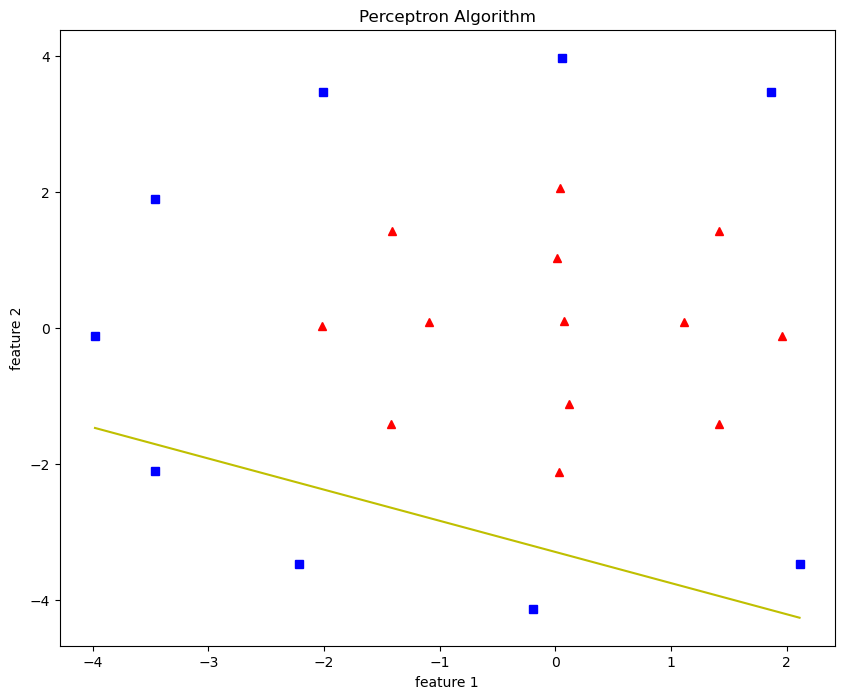

In [10]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values
theta, miss_l = perceptron(X, y, 0.01, 1000)
plot_decision_boundary(X, theta)

In [11]:
theta

array([[-0.02   ],
       [-0.00278],
       [-0.00607]])

## Question 2

In [12]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
print(df.head())

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
# y_train = y_train.values.reshape((-1,1))
# y_test = y_test.values.reshape((-1,1))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 2)
(154, 2)


In [20]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile model
opt = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

C:\Users\Shilpi\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train: 0.738, Test: 0.714


In [21]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile model
opt = SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

C:\Users\Shilpi\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train: 0.651, Test: 0.643
